# CPLEX example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the `MILPRouter` with cplex solver.

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Race Bank 2

> Note: the `load_repository()` functionality of `OptiWindNet` is used to load a prebuilt *Networkx.Graph* of the avaible locations. For more details on this functionality look into the notebook about [Load repositories containing location data](a03_load_repositories.ipynb).

In [3]:
locations = load_repository()

In [4]:
L = locations.race
max_cables_capacity = 5

In [5]:
wfn = WindFarmNetwork(L=L, cables=max_cables_capacity)

### Optimize Race Bank 2

Warmstart with `EWRouter`:

In [6]:
res_warmstart= wfn.optimize(router=EWRouter())
wfn.length()

94059.52543431189

In [7]:
milp_router = MILPRouter(solver_name='cplex', time_limit=20, mip_gap=0.002, verbose=True)
res = wfn.optimize(router=milp_router)

Using warm start: the model is initialized with the provided solution S.

Version identifier: 22.1.2.0 | 2024-11-25 | 0edbb82fd
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Parallel                                -1
CPXPARAM_Emphasis_MIP                            4
CPXPARAM_TimeLimit                               20
CPXPARAM_MIP_Tolerances_MIPGap                   0.002
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 93274.5215.
Tried aggregator 1 time.
MIP Presolve eliminated 366 rows and 0 columns.
MIP Presolve modified 1038 coefficients.
Reduced MIP has 2736 rows, 2076 columns, and 9870 nonzeros.
Reduced MIP has 1038 binaries, 1038 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (7.86 ticks)
Probing time = 0.00 sec. (2.89 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 2736 rows, 2076 columns, and 9870 nonzeros.
Reduced MIP has 1038 binaries, 1038 generals, 0 SOSs, and 0 indicators.
Pr

In [8]:
wfn.G.SolutionInfo

SolutionInfo(runtime=20.040464401245117, bound=87467.1755651591, objective=87802.98827587755, relgap=0.0038246159648157585, termination='maxTimeLimit')

In [9]:
wfn.length()

87802.98827587756

<Axes: >

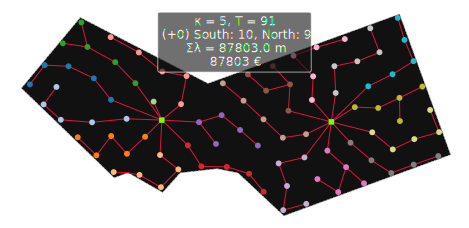

In [10]:
wfn.plot()